**Importing the libraries**

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Load the preprocessed train dataset**

Remove the regions column and save it to a new csv file

In [20]:
# Load the preprocessed Avocado dataset
datasets = pd.read_csv('avocado_preprocessed.csv')
# Drop all the region columns
datasets = datasets.drop(columns=datasets.filter(regex='^region_'))

# Save the modified dataframe back to a CSV file
datasets.to_csv("avocado_train_no_region.csv", index=False)

**Check for NaN values**

In [21]:
# Check for NaN values in each column
columns_with_nan = datasets.columns[datasets.isna().any()].tolist()

# Print the columns containing NaN
print("Columns containing NaN:")
print(columns_with_nan)

Columns containing NaN:
[]


In [22]:

datasets.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.000085  0.000006  0.000043  0.000000    0.000225    0.000325   
1      0.009256  0.006839  0.007476  0.006130    0.012828    0.010818   
2      0.000102  0.000089  0.000124  0.000000    0.000099    0.000138   
3      0.002329  0.003438  0.001894  0.000053    0.001474    0.001941   
4      0.000647  0.000007  0.001889  0.000000    0.000088    0.000127   

   Large Bags  XLarge Bags  type      year  Date_scaled  AveragePrice  
0    0.000001          0.0     1  0.666667     0.886905      0.512456  
1    0.009596          0.0     0  0.333333     0.315476      0.131673  
2    0.000012          0.0     1  0.333333     0.589286      0.558719  
3    0.000450          0.0     0  0.000000     0.029762      0.206406  
4    0.000000          0.0     1  0.333333     0.446429      0.387900

**Print the columns of the dataset**

In [23]:
# Print out the columns of the DataFrame to check for their existence and spelling
print(datasets.columns)


Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'Date_scaled',
       'AveragePrice'],
      dtype='object')


**Correlation matrix**

Selecting specific columns ('Date_scaled', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','type','year')  from an avocado dataset and calculates their correlation with the 'AveragePrice' column, providing insights into how features such as volume, bags, type, and year relate to avocado prices.

In [24]:
# Select relevant columns for correlation analysis
selected_columns = ['Date_scaled', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','type','year']

# Create a new DataFrame with selected columns
selected_data = datasets[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Iterate through each column and calculate correlation with 'AveragePrice'
for column in selected_columns:
    if column != 'AveragePrice':
        correlation = correlation_matrix.loc[column, 'AveragePrice']
        print(f"Correlation for {column} and AveragePrice is:", correlation)

# Extract correlations with the dependent variable (AveragePrice)
price_correlations = correlation_matrix['AveragePrice'].drop('AveragePrice')

Correlation for Date_scaled and AveragePrice is: 0.13991553198241283
Correlation for Total Volume and AveragePrice is: -0.5144362644730093
Correlation for 4046 and AveragePrice is: -0.5337442260697745
Correlation for 4225 and AveragePrice is: -0.42081658041620085
Correlation for 4770 and AveragePrice is: -0.47329645356874356
Correlation for Total Bags and AveragePrice is: -0.4969686019008452
Correlation for Small Bags and AveragePrice is: -0.4595709444325185
Correlation for Large Bags and AveragePrice is: -0.43225686573069566
Correlation for XLarge Bags and AveragePrice is: -0.36088745168216696
Correlation for type and AveragePrice is: 0.6250724718106047
Correlation for year and AveragePrice is: 0.09063980739006192


**Identifying Positive and Negative correlated variables**

Variables with correlation above 0 are positively correlated

Variables with correlation below 0 are negatively correlated

In [25]:
# Identify positive and negative correlated variables
positive_correlations = price_correlations[price_correlations > 0]
negative_correlations = price_correlations[price_correlations < 0]

print("Positive Correlations:")
print(positive_correlations)

print("\nNegative Correlations:")
print(negative_correlations)

Positive Correlations:
Date_scaled    0.139916
type           0.625072
year           0.090640
Name: AveragePrice, dtype: float64

Negative Correlations:
Total Volume   -0.514436
4046           -0.533744
4225           -0.420817
4770           -0.473296
Total Bags     -0.496969
Small Bags     -0.459571
Large Bags     -0.432257
XLarge Bags    -0.360887
Name: AveragePrice, dtype: float64


**Scatter plots for positive correlated features against AveragePrice**

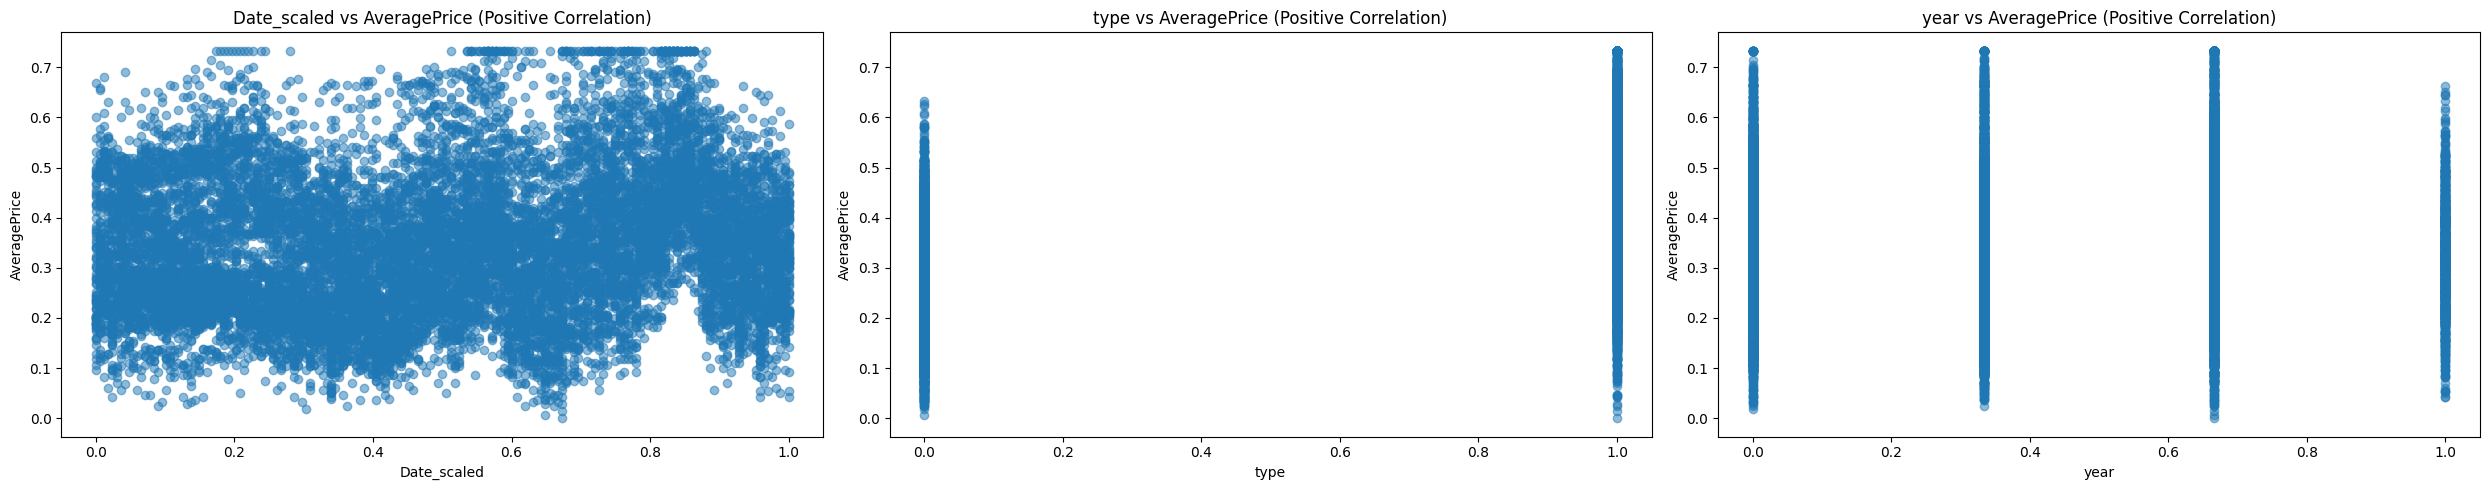

In [26]:
# Positive Correlations
positive_corr_columns = ['Date_scaled', 'type','year']
positive_data = datasets[['AveragePrice'] + positive_corr_columns]

fig, axes = plt.subplots(1, len(positive_corr_columns), figsize=(25, 5))

for i, column in enumerate(positive_corr_columns):
    axes[i].scatter(positive_data[column], positive_data['AveragePrice'], alpha=0.5)
    axes[i].set_title(f'{column} vs AveragePrice (Positive Correlation)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('AveragePrice')

plt.tight_layout()
plt.show()

**Inferences :**

It shows a positive correlation for 'Date_scaled', 'type','year' against the AveragePrice for which the AveragePrice increases with the progress of Date_Scaled, type and year

**Scatterplots for negative correlations agains the AveragePrice**

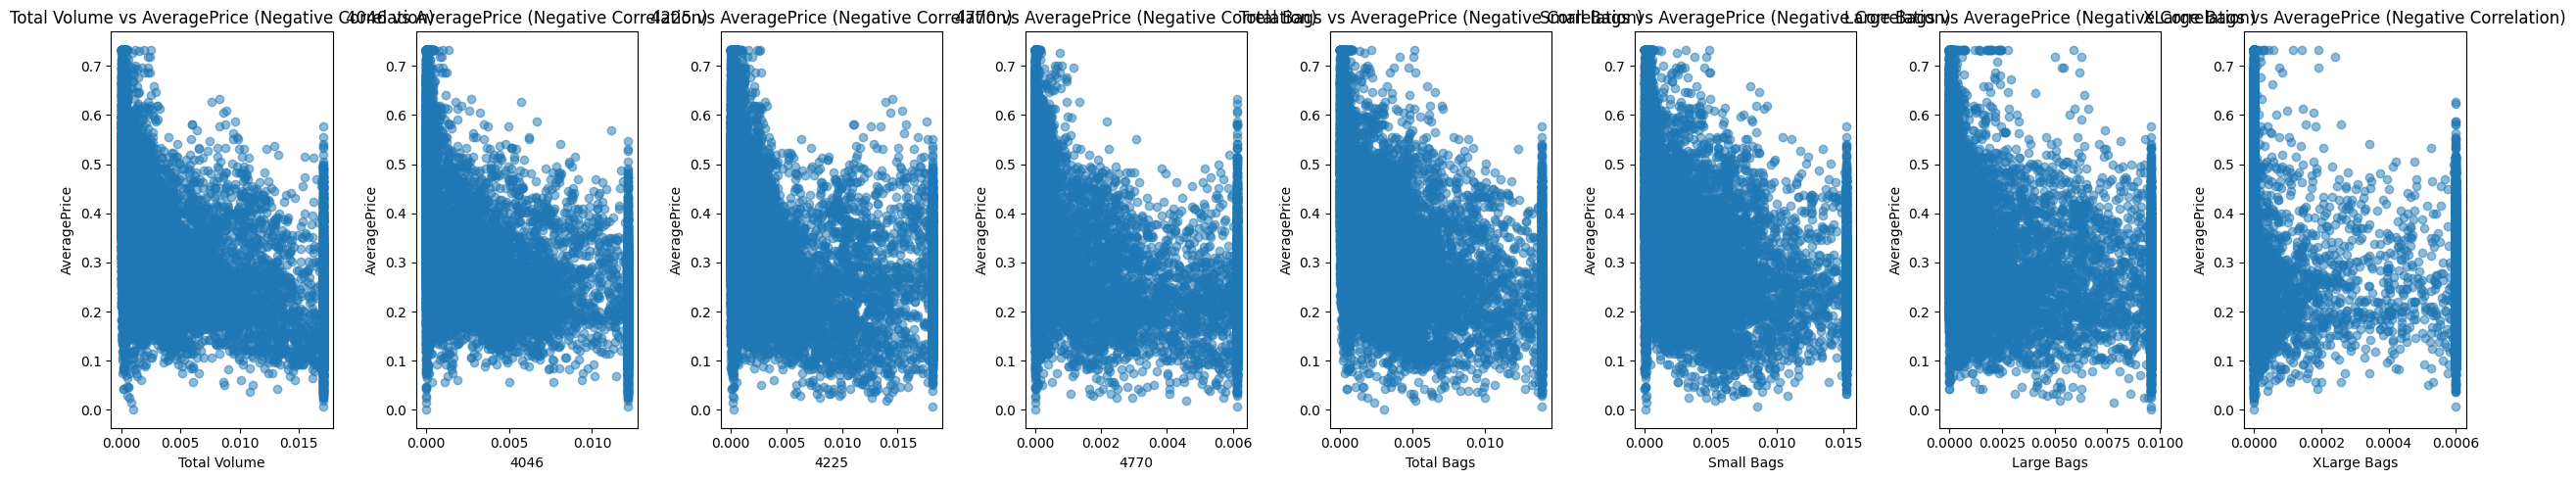

In [27]:
# Negative Correlations
negative_corr_columns = ['Total Volume' , '4046' , '4225' , '4770' , 'Total Bags' , 'Small Bags' ,'Large Bags' , 'XLarge Bags' ]
negative_data = datasets[['AveragePrice'] + negative_corr_columns]

fig, axes = plt.subplots(1, len(negative_corr_columns), figsize=(25, 5))

for i, column in enumerate(negative_corr_columns):
    axes[i].scatter(negative_data[column], negative_data['AveragePrice'], alpha=0.5)
    axes[i].set_title(f'{column} vs AveragePrice (Negative Correlation)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('AveragePrice')

plt.tight_layout()
plt.show()

**Inferences :**

It shows a negative correlation for the features 'Total Volume' , '4046' , '4225' , '4770' , 'Total Bags' , 'Small Bags' ,'Large Bags' , 'XLarge Bags' against the AveragePrice for which the AveragePrices decreases with the progress/increase of the 'Total Volume' , '4046' , '4225' , '4770' , 'Total Bags' , 'Small Bags' ,'Large Bags' , 'XLarge Bags'

**Check for missing values again**

In [28]:
# Check for missing values again
missing_values = datasets.isnull().sum()

datasets.fillna(0, inplace=True)

**Separate the features and the target variable (AveragePrice)**

**Split the data into train and test**

**Fit the linear model**

In [29]:
# Separate features and target variable
# X is independent variables and y gives dependent variable
X = datasets.drop(columns = ['AveragePrice'])
y = datasets['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Calculate the r2 score to assess the accuarcy of the model**

In [31]:
# Calculate R2 value
r2_score = model.score(X_train, y_train)
print("Initial R2 Score:", r2_score)

Initial R2 Score: 0.4878485039911382


In [32]:
# Assess the strength of the relationship between independent and dependent variables
X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1010.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:55:14   Log-Likelihood:                 10250.
No. Observations:               11679   AIC:                        -2.048e+04
Df Residuals:                   11667   BIC:                        -2.039e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2285      0.003     70.306   

Initially has an **r2 score** of 0.486 which is **48%** while fitting the linear model for all the independent features against the AveragePrice

**Calculating the positive and the negative average score**

In [33]:
# Positive Correlations
positive_corr_scores = {
   'Date_scaled': 0.140109,
   'type':0.624188,
   'year':0.091769
}

# Negative Correlations
negative_corr_scores = {
    'Total Volume': -0.515515,
    '4046': -0.533486,
    '4225':-0.420562,
    '4770': -0.473961,
    'Total Bags': -0.498184,
    'Small Bags':-0.460345,
    'Large Bags': -0.432683,
    'XLarge Bags': -0.361675
}

positive_total = sum(positive_corr_scores.values())
negative_total = sum(negative_corr_scores.values())

pos_count = len(positive_corr_scores)
neg_count = len(negative_corr_scores)

# Calculate the average scores for positive and negative correlations
pos_average = positive_total / pos_count if pos_count > 0 else 0.0
neg_average = negative_total / neg_count if neg_count > 0 else 0.0

print("Positive Average Score:", pos_average)
print("Negative Average Score:", neg_average)

# Determine attributes to be dropped
columns_to_drop = []

for column, score in positive_corr_scores.items():
    if score > neg_average and score < pos_average:
        columns_to_drop.append(column)

for column, score in negative_corr_scores.items():
    if score > neg_average and score < pos_average:
        columns_to_drop.append(column)

columns_to_drop.append('AveragePrice')  # Adding AveragePrice as it's mentioned in the original code

print("Attributes to be dropped:", columns_to_drop)


Positive Average Score: 0.28535533333333335
Negative Average Score: -0.46205137500000004
Attributes to be dropped: ['Date_scaled', 'year', '4225', 'Small Bags', 'Large Bags', 'XLarge Bags', 'AveragePrice']


**Fitting the linear model for selected features**

Selected features : type , Total Volume , 4046 , 4225 , 4770 ,Total Bags , Small Bags , Large Bags , XLarge Bags

In [34]:
X = datasets.drop(columns=['AveragePrice', 'year', 'Date_scaled'])
y = datasets['AveragePrice']
# Split the data into training  and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Prnting the stats model summary** to asses the accuarcy of the model after fitting the linear model for selected features alone which affects the Average price more compared to other independent features of the dataset

In [36]:
X_train = sm.add_constant(X_test)
model_sm = sm.OLS(y_test, X_test).fit()
print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              1707.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:55:14   Log-Likelihood:                          1450.5
No. Observations:                2920   AIC:                                     -2883.
Df Residuals:                    2911   BIC:                                     -2829.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Accuracy after fitting the linear model for selected features alone is **84%** **r2 score**  value is **0.841**